### ***Model Classification Logistic Regression & K-NN***

Kode ini mengimpor pustaka yang diperlukan untuk analisis data dan penerapan model klasifikasi dalam lingkungan Google Colab. Pertama,` from google.colab import files` memungkinkan pengguna untuk mengunggah atau mengunduh file. Kemudian, `import pandas as pd dan import numpy as np` digunakan untuk manipulasi data dan operasi numerik. Selanjutnya, import matplotlib.pyplot as plt digunakan untuk visualisasi data. Kode ini juga mengimpor train_test_split dari scikit-learn untuk membagi dataset, StandardScaler untuk menstandarisasi fitur, dan model klasifikasi seperti LogisticRegression dan KNeighborsClassifier. Terakhir, fungsi confusion_matrix dan accuracy_score diimpor untuk mengevaluasi kinerja model. Secara keseluruhan, kode ini menyediakan fondasi yang diperlukan untuk melakukan analisis dan klasifikasi data.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

Kode ini digunakan untuk memuat dan mempersiapkan dataset untuk analisis klasifikasi. Pertama, `uploaded = files.upload()` memungkinkan pengguna untuk mengunggah file, dan `df = pd.read_csv('Social_Network_Ads.csv')` membaca file CSV ke dalam DataFrame df. Dengan df.head(), beberapa baris pertama dari dataset ditampilkan untuk mendapatkan gambaran awal. Selanjutnya, `X = df[['Age', 'EstimatedSalary']].values dan y = df['Purchased']`.values memisahkan fitur (usia dan gaji yang diperkirakan) dan target (apakah produk dibeli). Dataset kemudian dibagi menjadi data pelatihan dan pengujian menggunakan train_test_split, dengan 20% data untuk pengujian. Terakhir, StandardScaler digunakan untuk menstandarisasi fitur, di mana fit_transform() diterapkan pada data pelatihan dan transform() pada data pengujian, memastikan bahwa kedua set data memiliki skala yang sama.

In [ ]:
uploaded = files.upload()
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


Kode ini digunakan untuk melatih dan mengevaluasi model regresi logistik pada dataset. Pertama, `logistic_model = LogisticRegression(random_state=0)` menginisialisasi model regresi logistik dengan seed acak untuk reproduktivitas. Kemudian, `logistic_model.fit(X_train, y_train)` melatih model menggunakan data pelatihan. Selanjutnya, `y_pred_logistic = logistic_model.predict(X_test)` menghasilkan prediksi untuk data pengujian. Untuk evaluasi,` confusion_matrix(y_test, y_pred_logistic)` menghitung matriks kebingungan, yang menunjukkan jumlah prediksi benar dan salah, sementara `accuracy_score(y_test, y_pred_logistic)` menghitung akurasi model. Akhirnya, hasil matriks kebingungan dan akurasi dicetak, memberikan gambaran tentang seberapa baik model regresi logistik melakukan klasifikasi pada data pengujian.

In [ ]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression Confusion Matrix:\n", cm_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Confusion Matrix:
 [[57  1]
 [ 5 17]]
Logistic Regression Accuracy: 0.925


Kode ini digunakan untuk melatih dan mengevaluasi model K-Nearest Neighbors (K-NN) pada dataset. Pertama, `knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)` menginisialisasi model K-NN dengan 5 tetangga terdekat, menggunakan metrik Minkowski dengan pangkat 2 (yaitu, jarak Euclidean). Kemudian, `knn_model.fit(X_train, y_train)` melatih model menggunakan data pelatihan. Selanjutnya, `y_pred_knn = knn_model.predict(X_test)` menghasilkan prediksi untuk data pengujian. Untuk evaluasi, confusion_matrix(y_test, y_pred_knn) menghitung matriks kebingungan, menunjukkan jumlah prediksi benar dan salah, sementara accuracy_score(y_test, y_pred_knn) menghitung akurasi model. Akhirnya, hasil matriks kebingungan dan akurasi dicetak, memberikan gambaran tentang seberapa baik model K-NN dalam melakukan klasifikasi pada data pengujian.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("K-NN Confusion Matrix:\n", cm_knn)
print("K-NN Accuracy:", accuracy_knn)

K-NN Confusion Matrix:
 [[55  3]
 [ 1 21]]
K-NN Accuracy: 0.95


Kode ini digunakan untuk memvisualisasikan hasil klasifikasi dari model regresi logistik dan K-Nearest Neighbors (K-NN) pada dataset. Pertama, grid nilai untuk fitur usia dan gaji yang diperkirakan dibuat menggunakan np.meshgrid. Selanjutnya, plt.contourf digunakan untuk menggambar area yang terisi berdasarkan prediksi model regresi logistik, dengan batas sumbu X dan Y diatur menggunakan plt.xlim dan plt.ylim. Titik data pelatihan ditampilkan dengan plt.scatter, menunjukkan kelas sebenarnya dengan warna yang sesuai. Proses yang sama diulang untuk model K-NN, tetapi kali ini menggunakan data pengujian (X_test dan y_test). Hasilnya, dua plot dihasilkan: satu untuk klasifikasi pada data pelatihan dengan regresi logistik dan satu lagi untuk klasifikasi pada data pengujian dengan K-NN. Visualisasi ini membantu dalam memahami bagaimana model memisahkan kelas berdasarkan fitur yang diberikan.

<ipython-input-10-bc5bcafbd531>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


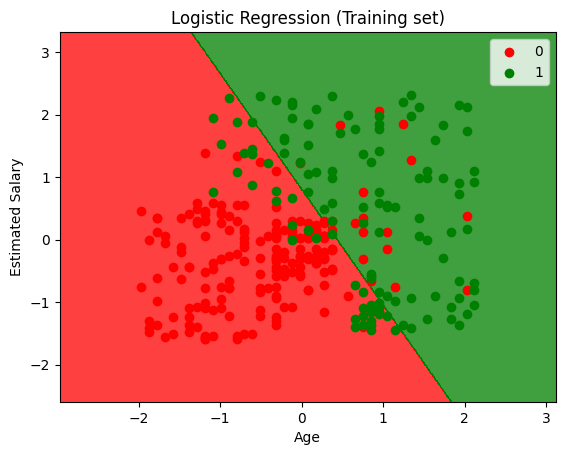

<ipython-input-10-bc5bcafbd531>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


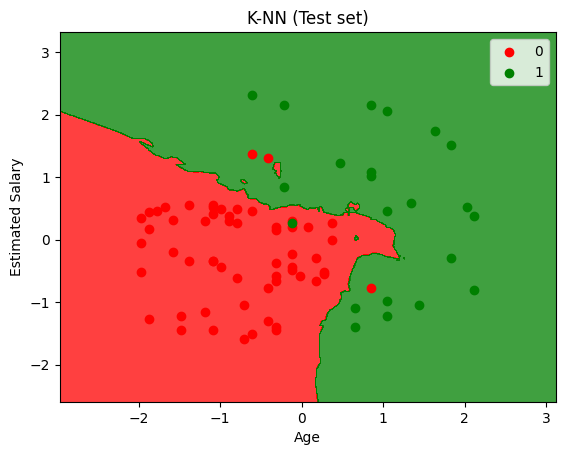

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()